# Data-Driven Modeling and Optimization


## StatQuest Videos

* [Histograms, Clearly Explained](https://youtu.be/qBigTkBLU6g)
* [The Main Ideas behind Probability Distributions](https://youtu.be/oI3hZJqXJuc)
* [The Normal Distribution, Clearly Explained!!!](https://youtu.be/rzFX5NWojp0)
* [The mean, the media, and the mode]
* [The exponential distribution]
* [Population and Estimated Parameters, Clearly Explained!!!](https://youtu.be/vikkiwjQqfU)
* [Calculating the Mean, Variance and Standard Deviation, Clearly Explained!!!](https://youtu.be/SzZ6GpcfoQY)
* [What is a mathematical model?]
* [Sampling from a Distribution, Clearly Explained!!!](https://youtu.be/XLCWeSVzHUU)
* [Hypothesis Testing and the Null-Hypothesis, Clearly Explained!!!]
* [Alternative Hypotheses, Main Ideas]
* [p-values: What they are and how to interpret them]
* [How to calculate p-values]
* [p-hacking: What it is and how to avoid it]
* [Covariance, Clearly Explained!!!]
* [Pearson's Correlation, Clearly Explained]
* [Boxplots are Awesome]
* [R-squared, Clearly Explained](https://youtu.be/2AQKmw14mHM)
  * Note: When I first made this video, I was thinking about how R-squared relates to Linear Regression, which will not fit a line worse than the mean of the y-axis values. This is because if the values along the x-axis are truly useless in terms of predicting y-axis values, then the slope of the line used to make predictions will be 0, and the intercept will equal the mean. However, it is possible to simply draw a line that fits the data worse than the mean and get a negative R^2. 
* [The main ideas of fitting a line to data (The main ideas of least squares and linear regression.)](https://www.youtube.com/embed/PaFPbb66DxQ)
* [Linear Regression, Clearly Explained](https://youtu.be/nk2CQITm_eo)
* [Multiple Regression, Clearly Explained]


## Introduction to Statistical Learning


::: {.callout-note}

Parts of this course are based on the book **An Introduction to Statistical Learning**, @Jame14a.
Some of the figures in this presentation are taken from **An Introduction to Statistical Learning** (Springer, 2013) with permission from the authors: G. James, D. Witten,  T. Hastie and R. Tibshirani.
:::

### Opening Remarks and Examples

* Artificial Intelligence (AI)
* Machine learning (ML)
* Deep Learning (DL)

![AI, ML, and DL. Taken fron @chol18b](./figures_static/aimldl.png)


* 1980's neural networks.
* Statistical learning.
* IBM Watson supercomputer.


Statistical learning problems include:

1. Identification of prostate cancer through PSA and other measurements such as age, Gleason score, etc. Scatter plots help reveal the nature of the data and its correlations. Using transformed data (log scale) can highlight typos in the data; for example, a patient with a 449-gram prostate. Recommendation: Always examine the data before conducting any sophisticated analysis.

2. Classification of phonemes, specifically between "aa" and "ao."

3. Prediction of heart attacks, which can be visualized through colored scatter plots.

4. Detection of email spam, based on the frequency of words within the messages, using 57 features.

5. Identification of numbers in handwritten zip codes, which involves pattern recognition.

6. Classification of tissue samples into cancer classes based on gene expression profiles, utilizing heat maps for visualization.

7. Establishing the relationship between salary and demographic variables like income (wage) versus age, year, and education level, employing regression models.

8. Classification of pixels in LANDSAT images by their usage, using nearest neighbor methods.



#### Supervised and Unsupervised Learning

Two important types: supervised and unsupervised learning.
There is even more, e.g., semi-supervised learning.

##### Starting point

* Outcome measurement $Y$ (dependent variable, response, target).
* Vector of $p$ predictor measurements $X$ (inputs, regressors, covariates, features, independent variables).
* Training data $(x_1, y1), \ldots ,(x_N, y_N)$. These are observations (examples, instances) of these measurements.

In the *regression* problem, $Y$ is quantitative (e.g., price, blood pressure).
In the *classification* problem, $Y$ takes values in a finite, unordered set (e.g., survived/died, digit 0-9, cancer class of tissue sample).

##### Philosophy

It is important to understand the ideas behind the various techniques,
in order to know how and when to use them.
One has to understand the simpler methods first, in order to grasp the more sophisticated ones.
It is important to accurately assess the performance of a method,
to know how well or how badly it is working (simpler methods often perform as well as fancier ones!)
This is an exciting research area, having important applications in science, industry and finance.
Statistical learning is a fundamental ingredient in the training of a modern data scientist.


## Basics

### Histograms

Creating a histogram and calculating the probabilities from a dataset can be approached with scientific precision

1. Data Collection: Obtain the dataset you wish to analyze. This dataset could represent any quantitative measure, such to examine its distribution.

2. Decide on the Number of Bins: The number of bins influences the histogram's granularity. There are several statistical rules to determine an optimal number of bins:
   * Square-root rule: suggests using the square root of the number of data points as the number of bins.
   * Sturges' formula: $k = 1 + 3.322 \log_{10}(n)$, where $n$ is the number of data points and $k$ is the suggested number of bins.
   * Freedman-Diaconis rule: uses the interquartile range (IQR) and the cube root of the number of data points $n$ to calculate bin width as $2 \dfrac{IQR}{n^{1/3}}$.

3. Determine Range and Bin Width: Calculate the range of data by subtracting the minimum data point value from the maximum. Divide this range by the number of bins to determine the width of each bin.

4. Allocate Data Points to Bins: Iterate through the data, sorting each data point into the appropriate bin based on its value.

5. Draw the Histogram: Use a histogram to visualize the frequency or relative frequency (probability) of data points within each bin.

6. Calculate Probabilities: The relative frequency of data within each bin represents the probability of a randomly selected data point falling within that bin's range.

Below is a Python script that demonstrates how to generate a histogram and compute probabilities using the `matplotlib` library for visualization and `numpy` for data manipulation.


Text(0.5, 1.0, 'Histogram with Probability Density')

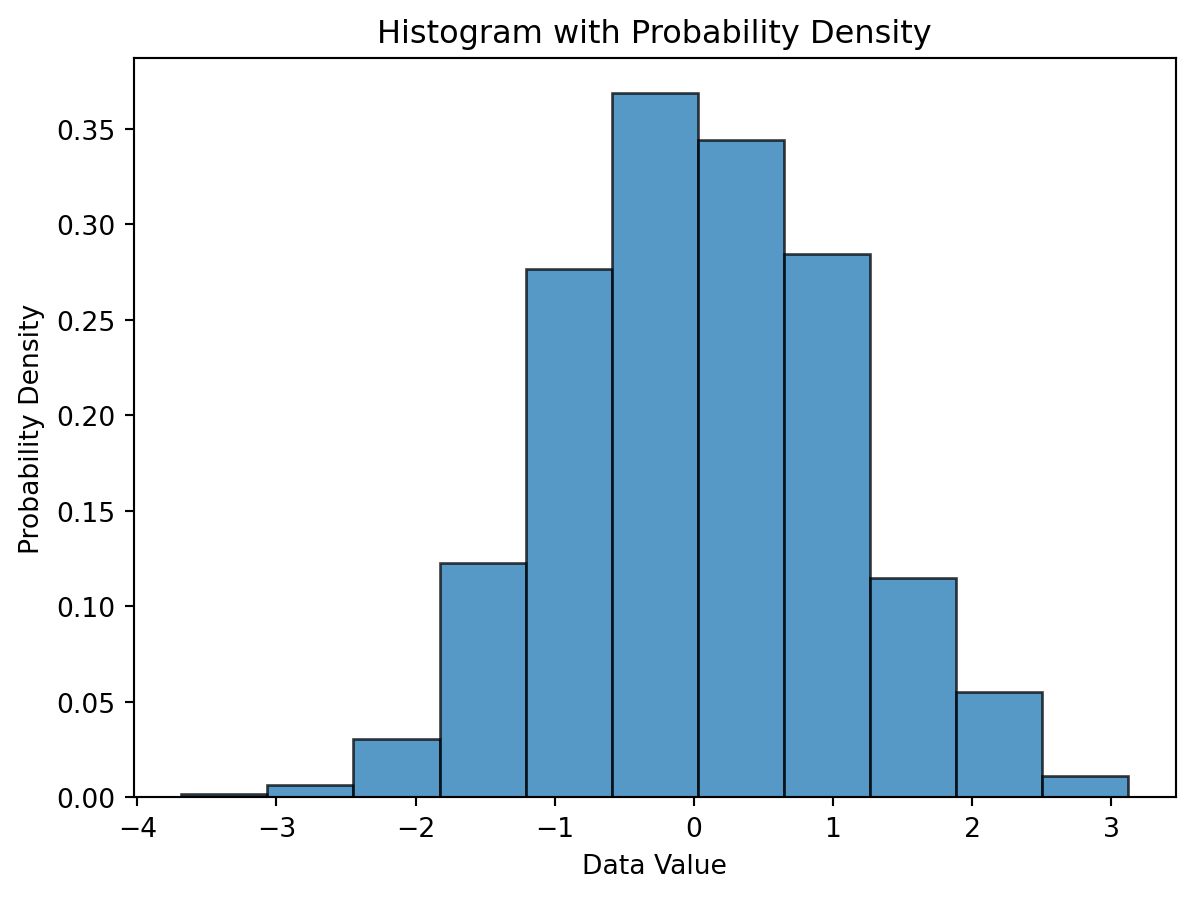

In [1]:
#| label: fig-histogram
#| fig-cap: Histogram with Probability Density

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Sample data: Randomly generated for demonstration
data = np.random.normal(0, 1, 1000)  # 1000 data points with a normal distribution

# Step 2: Decide on the number of bins
num_bins = int(np.ceil(1 + 3.322 * np.log10(len(data))))  # Sturges' formula

# Step 3: Determine range and bin width -- handled internally by matplotlib

# Steps 4 & 5: Sort data into bins and draw the histogram
fig, ax = plt.subplots()
n, bins, patches = ax.hist(data, bins=num_bins, density=True, alpha=0.75, edgecolor='black')

# Calculate probabilities (relative frequencies) manually, if needed
bin_width = np.diff(bins)  # np.diff finds the difference between adjacent bin boundaries
probabilities = n * bin_width  # n is already normalized to form a probability density if `density=True`

# Adding labels and title for clarity
ax.set_xlabel('Data Value')
ax.set_ylabel('Probability Density')
ax.set_title('Histogram with Probability Density')

In [2]:
for i, prob in enumerate(probabilities):
    print(f"Bin {i+1} Probability: {prob:.4f}")

# Ensure probabilities sum to 1 (or very close, due to floating-point arithmetic)
print(f"Sum of probabilities: {np.sum(probabilities)}")

Bin 1 Probability: 0.0010
Bin 2 Probability: 0.0040
Bin 3 Probability: 0.0190
Bin 4 Probability: 0.0760
Bin 5 Probability: 0.1710
Bin 6 Probability: 0.2280
Bin 7 Probability: 0.2130
Bin 8 Probability: 0.1760
Bin 9 Probability: 0.0710
Bin 10 Probability: 0.0340
Bin 11 Probability: 0.0070
Sum of probabilities: 1.0


This code segment goes through the necessary steps to generate a histogram and calculate probabilities for a synthetic dataset. It demonstrates important scientific and computational practices including binning, visualization, and probability calculation in Python.

Key Points:
- The histogram represents the distribution of data, with the histogram's bins outlining the data's spread and density.
- The option `density=True` in `ax.hist()` normalizes the histogram so that the total area under the histogram sums to 1, thereby converting frequencies to probability densities.
- The choice of bin number and width has a significant influence on the histogram's shape and the insights that can be drawn from it, highlighting the importance of selecting appropriate binning strategies based on the dataset's characteristics and the analysis objectives.


### Probability Distributions

What happens when we use smaller bins in a histogram? The histogram becomes more detailed, revealing the distribution of data points with greater precision. However, as the bin size decreases, the number of data points within each bin may decrease, leading to sparse or empty bins. This sparsity can make it challenging to estimate probabilities accurately, especially for data points that fall within these empty bins.

Advantages, when using a probability distribution, include:

  * Blanks can be filled
  * Probabilities can be calculated
  * Parameters are sufficiemnt to describe the distribution, e.g., mean and variance for the normal distribution

Probability distributions offer a powerful solution to the challenges posed by limited data in estimating probabilities. When data is scarce, constructing a histogram to determine the probability of certain outcomes can lead to inaccurate or unreliable results due to the lack of detail in the dataset. However, collecting vast amounts of data to populate a histogram for more precise estimates can often be impractical, time-consuming, and expensive.

A probability distribution is a mathematical function that provides the probabilities of occurrence of different possible outcomes for an experiment. It is a more efficient approach to understanding the likelihood of various outcomes than relying solely on extensive data collection. For continuous data, this is often represented graphically by a smooth curve.

#### The Normal Distribution: A Common Example

A commonly encountered probability distribution is the normal distribution, known for its characteristic bell-shaped curve. This curve represents how the values of a variable are distributed: most of the observations cluster around the mean (or center) of the distribution, with frequencies gradually decreasing as values move away from the mean.

The normal distribution is particularly useful because of its defined mathematical properties. It is determined entirely by its mean (mu, $\mu$) and its standard deviation (sigma, $\sigma$). The area under the curve represents probability, making it possible to calculate the likelihood of a random variable falling within a specific range.

#### Practical Example: Estimating Probabilities

Consider we are interested in the heights of adults in a population. Instead of measuring the height of every adult (which would be impractical), we can use the normal distribution to estimate the probability of adults' heights falling within certain intervals, assuming we know the mean and standard deviation of the heights.


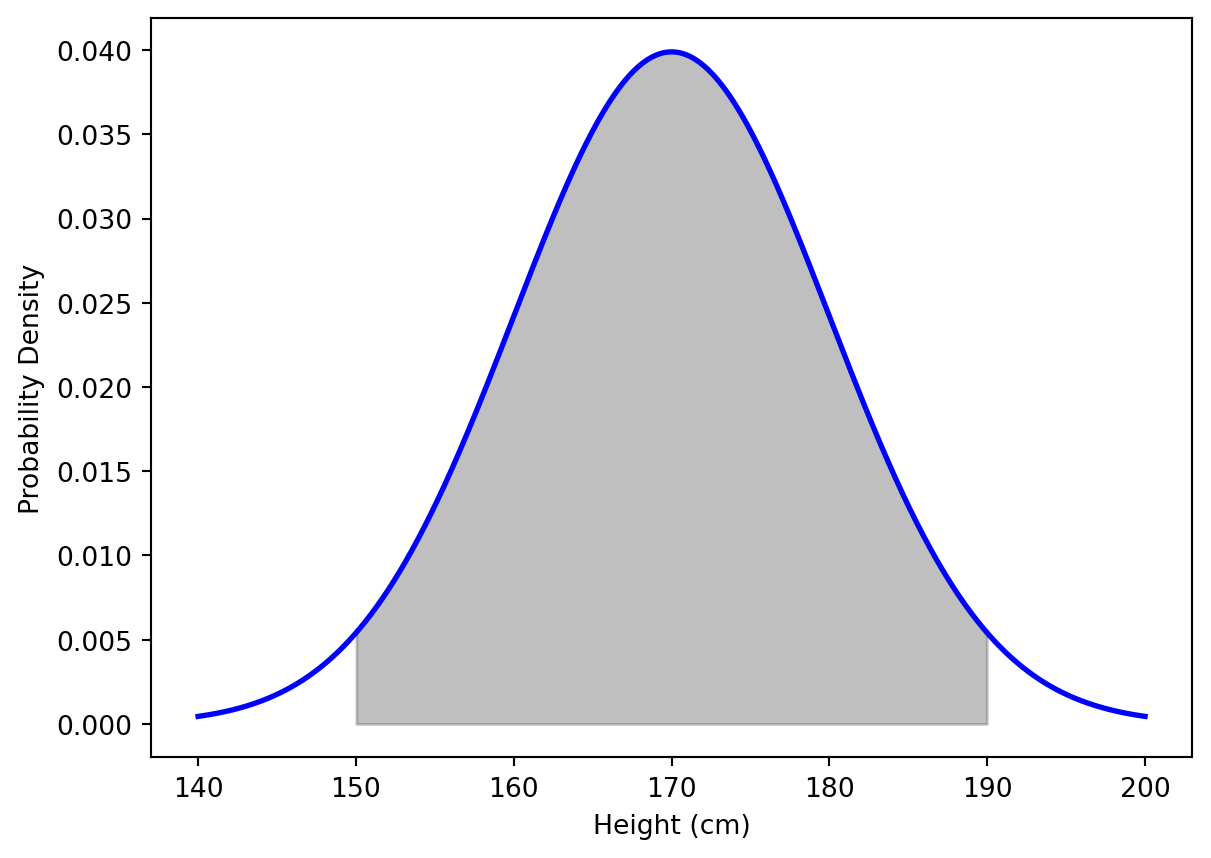

In [3]:
#| label: fig-normal-distribution
#| fig-cap: Normal Distribution Curve with Highlighted Probability Area. 95 percent of the data falls within two standard deviations of the mean.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
mu = 170  # e.g., mu height of adults in cm
sd = 10  # e.g., standard deviation of heights in cm
heights = np.linspace(mu - 3*sd, mu + 3*sd, 1000)
# Calculate the probability density function for the normal distribution
pdf = norm.pdf(heights, mu, sd)
# Plot the normal distribution curve
plt.plot(heights, pdf, color='blue', linewidth=2)
plt.fill_between(heights, pdf, where=(heights >= mu - 2 * sd) & (heights <= mu + 2*sd), color='grey', alpha=0.5)
plt.xlabel('Height (cm)')
plt.ylabel('Probability Density')
plt.show()

This Python code snippet generates a plot of the normal distribution for adult heights, with a mean of 170 cm and a standard deviation of 10 cm. It visually approximates a histogram with a blue bell-shaped curve, and highlights (in grey) the area under the curve between $\mu \pm 2 \times \sigma$.
This area corresponds to the probability of randomly selecting an individual whose height falls within this range. 

By using the area under the curve, we can efficiently estimate probabilities without needing to collect and analyze a vast amount of data. This method not only saves time and resources but also provides a clear and intuitive way to understand and communicate statistical probabilities.

### Discrete Distributions

Discrete probability distributions are essential tools in statistics, providing a mathematical foundation to model and analyze situations with discrete outcomes. 
Histograms, which can be seen as discrete distributions with data organized into bins, offer a way to visualize and estimate probabilities based on the collected data. However, they come with limitations, especially when data is scarce or when we encounter gaps in the data (blank spaces in histograms). These gaps can make it challenging to accurately estimate probabilities.

A more efficient approach, especially for discrete data, is to use mathematical equations---particularly those defining discrete probability distributions---to calculate probabilities directly, thus bypassing the intricacies of data collection and histogram interpretation.

#### Bernoulli Distribution

The Bernoulli distribution, named after Swiss scientist Jacob Bernoulli, is a discrete probability distribution, which takes value $1$ with success probability $p$ and value $0$ with failure probability $q = 1-p$. So if $X$ is a random variable with this distribution, we have:
$$
P(X=1) = 1-P(X=0) = p = 1-q.
$$

#### Binomial Distribution

The Binomial Distribution is a prime example of a discrete probability distribution that is particularly useful for binary outcomes (e.g., success/failure, yes/no, pumpkin pie/blueberry pie). It leverages simple mathematical principles to calculate the probability of observing a specific number of successes (preferred outcomes) in a fixed number of trials, given the probability of success in each trial.

#### An Illustrative Example: Pie Preference

Consider a scenario from "StatLand" where 70% of people prefer pumpkin pie over blueberry pie. The question is: What is the probability that, out of three people asked, the first two prefer pumpkin pie and the third prefers blueberry pie?

Using the concept of the Binomial Distribution, the probability of such an outcome can be calculated without the need to layout every possible combination by hand. This process not only simplifies calculations but also provides a clear and precise method to determine probabilities in scenarios involving discrete choices.
We will use Python to calculate the probability of observing exactly two out of three people prefer pumpkin pie, given the 70% preference rate:


In [4]:
from scipy.stats import binom
n = 3  # Number of trials (people asked)
p = 0.7  # Probability of success (preferring pumpkin pie)
x = 2  # Number of successes (people preferring pumpkin pie)
# Probability calculation using Binomial Distribution
prob = binom.pmf(x, n, p)
print(f"The probability that exactly 2 out of 3 people prefer pumpkin pie is: {prob:.3f}")

The probability that exactly 2 out of 3 people prefer pumpkin pie is: 0.441


This code uses the `binom.pmf()` function from `scipy.stats` to calculate the probability mass function (PMF) of observing exactly `x` successes in `n` trials, where each trial has a success probability of `p`.

A Binomial random variable is the sum of $n$ independent, identically distributed Bernoulli random variables, each with probability $p$ of success. 
We may indicate a random variable $X$ with Bernoulli distribution using the notation $X \sim \mathrm{Bi}(1,\theta)$. Then, the notation for the Binomial is
$X \sim \mathrm{Bi}(n,\theta)$. Its probability and distribution functions are, respectively,
$$
p_X(x) = {n\choose x}\theta^x(1-\theta)^{n-x}, \qquad F_X(x) = \Pr\{X \le x\} = \sum_{i=0}^{x} {n\choose i}\theta^i(1-\theta)^{n-i}.
$$

The mean of the binomial distribution is $\text{E}[X] = n\theta$. 
The variance of the distribution is $\text{Var}[X] = n\theta(1-\theta)$ (see next section).

A process consists of a sequence of $n$ independent trials, i.e., the outcome of each trial does not depend on the outcome of previous trials.
The outcome of each trial is either a success or a failure. The probability of success is denoted as $p$, and $p$ is constant for
each trial. Coin tossing is a classical example for this setting.

The binomial distribution is a statistical distribution giving the probability of obtaining a specified number of successes in a binomial experiment;
written Binomial(n, p), where $n$ is the number of trials, and $p$ the probability of success in each.

::: {#def-binom}

#### Binomial Distribution

The binomial distribution with parameters $n$ and $p$,
where $n$ is the number of trials, and $p$ the probability of success in each, is
\begin{equation}
p(x) = { n \choose k } p^x(1-p)^{n-x} \qquad x = 0,1, \ldots, n.
\end{equation}
The mean $\mu$ and the variance $\sigma^2$ of the binomial distribution are
\begin{equation}
\mu = np
\end{equation}
and
\begin{equation}
\sigma^2 = np(1-p).
\end{equation}

:::

Note, the Bernoulli distribution is simply Binomial(1,p).

##  Continuous Distributions
Our considerations regarding probability distributions, expectations, and standard deviations will be extended from discrete distributions to  continuous distributions. One simple example of a continuous distribution is the uniform distribution. Continuous distributions are defined by probability
 density functions.

### Distribution functions: PDFs and CDFs

The density for a continuous distribution is a measure of the relative probability of "getting a value close to $x$." 
Probability density functions $f$ and cumulative distribution function $F$  are related as follows.
\begin{equation}
f(x) = \frac{d}{dx} F(x)
\end{equation}

### Expectation (Continuous)

::: {#def-expectation}

#### Expectation (Continuous)

\begin{equation}
  \text{E}(X) = \int_{-\infty}^\infty x f(x) \, dx
  \end{equation}
:::

### Variance and Standard Deviation (Continuous)


::: {#def-variance}

#### Variance (Continuous)

Variance can be calculated with $\text{E}(X)$ and
\begin{equation}
  \text{E}(X^2) = \int_{-\infty}^\infty x^2 f(x) \, dx
\end{equation}
  as
\begin{equation*}
  \text{Var}(X) = \text{E}(X^2) - [ E(X)]^2.
  \end{equation*}
  \hfill $\Box$
:::

::: {#def-standard-deviation}

#### Standard Deviation (Continuous)

Standard deviation can be calculated 
  as
  \begin{equation*}
  \text{sd}(X) = \sqrt{\text{Var}(X)}.
  \end{equation*}
  \hfill $\Box$
:::

### Uniform Distribution

This variable is defined in the interval $[a,b]$. We write it as $X \sim U[a,b]$. Its
density and cumulative distribution functions are, respectively,
$$
f_X(x) = \frac{I_{[a,b]}(x)}{b-a}, 	\quad\quad F_X(x) = \frac{1}{b-a}\int\limits_{-\infty}\limits^x I_{[a,b]}(t) \mathrm{d}t = \frac{x-a}{b-a},
$$
where $I_{[a,b]}(\cdot)$ is the indicator function of the interval
$[a,b]$. 
Note that, if we set $a=0$ and $b=1$,
we obtain $F_X(x) = x$, $x$ $\in$ $[0,1]$.

A typical example is the following: the cdf of a continuous r.v. is uniformly distributed in
$[0,1]$. The proof of this statement is as follows: For $u$ $\in$
$[0,1]$, we have
\begin{eqnarray*}
\Pr\{F_X(X) \leq u\} &=& \Pr\{F_X^{-1}(F_X(X)) \leq F_X^{-1}(u)\} = \Pr\{X \leq F_X^{-1}(u)\} \\
	                  &=& F_X(F_X^{-1}(u)) = u.		
\end{eqnarray*}
This means that, when $X$ is continuous, there is a one-to-one relationship (given by the cdf) between $x$ $\in$ $D_X$ and $u$ $\in$ $[0,1]$.

The \emph{uniform distribution} has a constant density over a specified interval, say $[a,b]$.
 The uniform $U(a,b)$ distribution has density
 \begin{equation}
 f(x) = 
 \left\{
  \begin{array}{ll}
  1/(b-a) & \textrm{ if } a < x < b,\\
  0 & \textrm{ otherwise}
  \end{array}
  \right.
  \end{equation}

### Normal Distribution
  
::: {#def-normal}

#### Normal Distribution

This variable is defined on the support $D_X = \mathbb{R}$ and its density
function is given by
$$
f_X(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left \{-\frac{1}{2\sigma^2}(x-\mu)^2 \right \}.
$$
The density function is identified by the pair of parameters
$(\mu,\sigma^2)$, where $\mu$ $\in$ $\mathbb{R}$ is the mean (or location
parameter) and $\sigma^2 > 0$ is the variance (or dispersion parameter)
of $X$. 
\hfill $\Box$
:::

The density function is symmetric around $\mu$. The normal distribution belongs to the location-scale family
distributions. This means that, if $Z \sim N(0,1)$ (read, $Z$ has a standard normal distribution; i.e., with $\mu=0$ and $\sigma^2=1$), and we 
consider the linear transformation $X = \mu + \sigma Z$, then $X \sim N(\mu,\sigma^2)$ (read, $X$ has a normal distribution with mean
$\mu$ and variance $\sigma^2$). This means that one can obtain the probability of any interval $(-\infty,x]$, $x$ $\in$ $R$ for any normal distribution (i.e., for any pair of the parameters $\mu$ and $\sigma$) once the quantiles of the standard normal distribution are known. Indeed
\begin{eqnarray*}
F_X(x) &=& \Pr\left\{X \leq x \right\} = \Pr\left\{\frac{X-\mu}{\sigma} \leq \frac{x-\mu}{\sigma} \right\} \\
           &=& \Pr\left\{Z \leq \frac{x-\mu}{\sigma}\right\}  = F_Z\left(\frac{x-\mu}{\sigma}\right)	\qquad x \in \mathbb{R}.
\end{eqnarray*}
The quantiles of the standard normal
distribution are available in any statistical program. The density and
cumulative distribution function of the standard normal r.v.~at point
$x$ are usually denoted by the symbols $\phi(x)$ and $\Phi(x)$.

The standard normal distribution is based on the 
\emph{standard normal density function}
$$
 \varphi(z) = \frac{1}{\sqrt{2\pi}} \exp \left(- \frac{z^2}{2} \right).
$$ {#eq-standardization}

An important application of the standardization introduced in @eq-standardization reads as follows.
In case the distribution of $X$ is approximately normal, the distribution of X^{*} is approximately standard normal.
That is
\begin{equation*}
  P(X\leq b) = P( \frac{X-\mu}{\sigma} \leq \frac{b-\mu}{\sigma}) = P(X^{*} \leq \frac{b-\mu}{\sigma})
\end{equation*}
The probability $P(X\leq b)$ can be approximated by $\Phi(\frac{b-\mu}{\sigma})$,
where $\Phi$ is the standard normal cumulative distribution function. 
  
If $X$ is a normal random variable with mean $\mu$ and variance $\sigma^2$,
  i.e., $X \sim \cal{N} (\mu, \sigma^2)$, then
  \begin{equation}
  X = \mu + \sigma Z \textrm{ where } Z \sim \cal{N}(0,1).
  \end{equation}
  
  
If $Z \sim \cal{N}(0,1)$ and $X\sim \cal{N}(\mu, \sigma^2)$, then 
  \begin{equation*}
  X = \mu + \sigma Z. 
\end{equation*}
  
 The probability of getting a value in a particular interval is the area
 under the corresponding part of the curve.
 Consider the density function of the normal distribution. It can 
 be plotted using the following commands.
 The result is shown in @fig-normal-density.


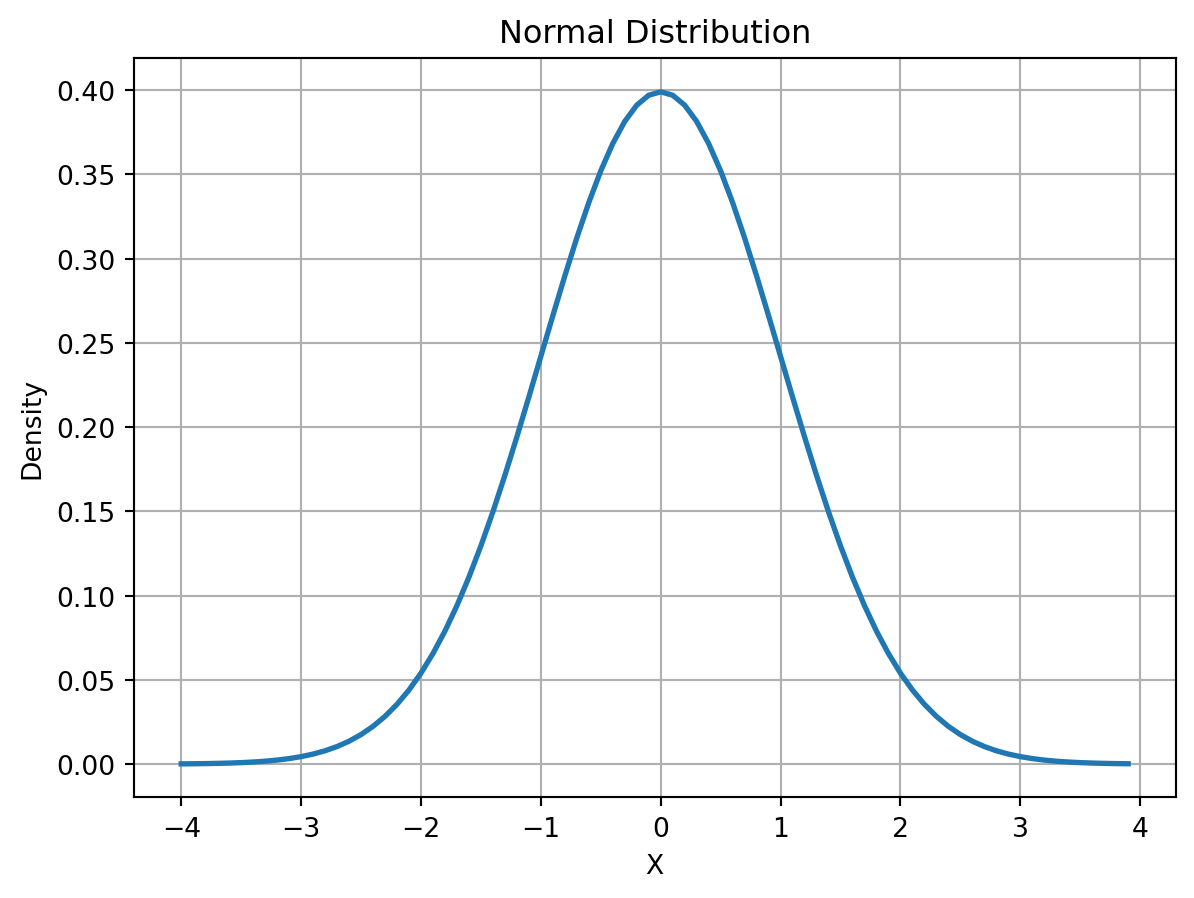

In [5]:
#| label: fig-normal-density
#| fig-cap: Normal Distribution Density Function
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
x = np.arange(-4, 4, 0.1)
# Calculating the normal distribution's density function values for each point in x
y = norm.pdf(x, 0, 1)
plt.plot(x, y, linestyle='-', linewidth=2)
plt.title('Normal Distribution')
plt.xlabel('X')
plt.ylabel('Density')
plt.grid(True)
plt.show()

The \emph{cumulative distribution function} (CDF) describes the probability
of "hitting" $x$ or less in a given distribution.
We consider the CDF function of the normal distribution. It can be plotted using the following commands.
The result is shown in @fig-normal-cdf.


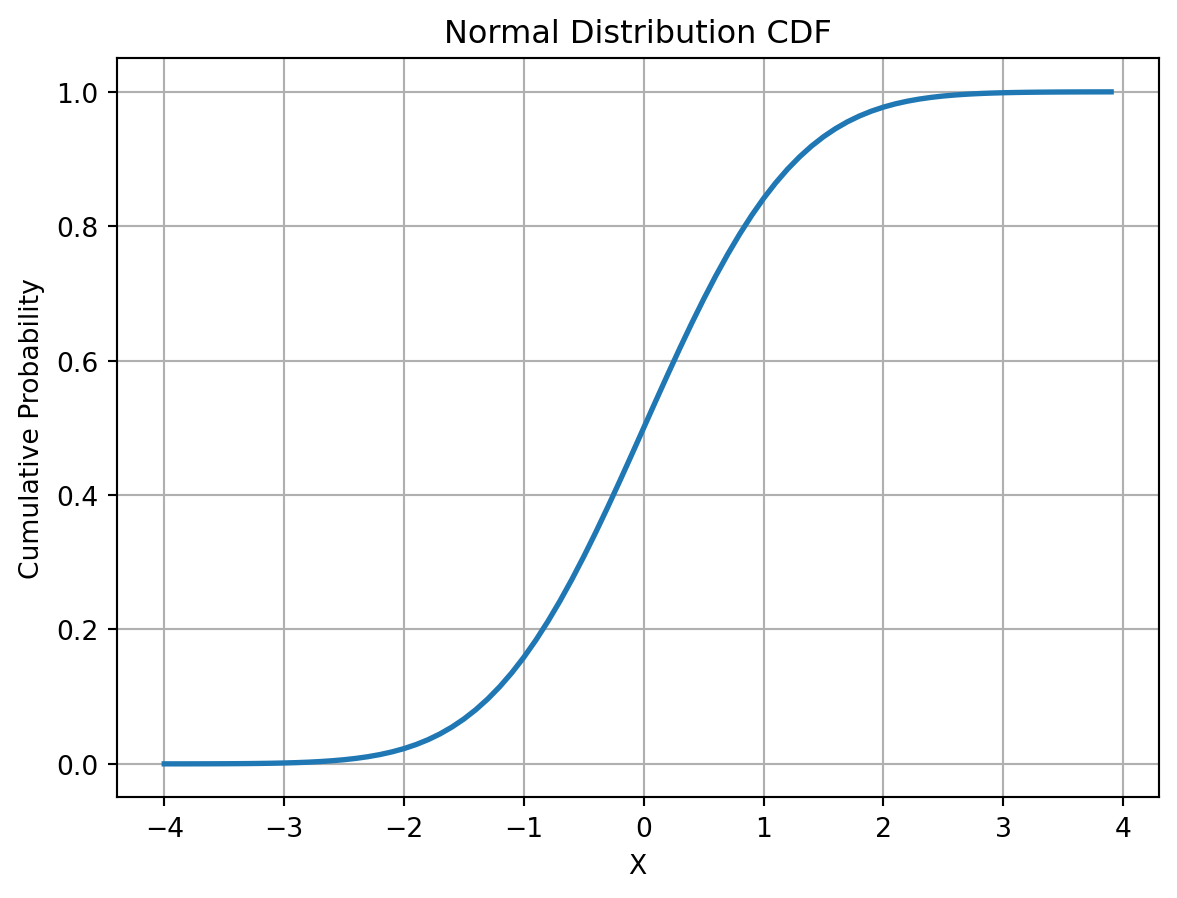

In [6]:
#| label: fig-normal-cdf
#| fig-cap: Normal Distribution Cumulative Distribution Function
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generating a sequence of numbers from -4 to 4 with 0.1 intervals
x = np.arange(-4, 4, 0.1)

# Calculating the cumulative distribution function value of the normal distribution for each point in x
y = norm.cdf(x, 0, 1)  # mean=0, stddev=1

# Plotting the results. The equivalent of 'type="l"' in R (line plot) becomes the default plot type in matplotlib.
plt.plot(x, y, linestyle='-', linewidth=2)
plt.title('Normal Distribution CDF')
plt.xlabel('X')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()

### The Mean, the Median, and the Mode

### The Exponential Distribution

The exponential distribution is a continuous probability distribution that describes the time between events in a Poisson process, where events occur continuously and independently at a constant average rate. It is characterized by a single parameter, the rate parameter $\lambda$, which represents the average number of events per unit time.

### Population and Estimated Parameters

### Calculating the Mean, Variance, and Standard Deviation

### What is a Mathematical Model?

### Sampling from a Distribution

### Hypothesis Testing and the Null Hypothesis

### Alternative Hypotheses

### p-values: What They Are and How to Interpret Them

### How to Calculate p-values

### p-hacking: What It Is and How to Avoid It

### Covariance

### Pearson's Correlation

### Boxplots

### R-squared

### The Main Ideas of Fitting a Line to Data

### Linear Regression

### Multiple Regression


## Supervised Learning

Objectives of supervised learning: On the basis of the training data we would like to:

* Accurately predict unseen test cases.
* Understand which inputs affect the outcome, and how.
* Assess the quality of our predictions and inferences.

Note: Supervised means $Y$ is known.

::: {#exr-starting-point}

* Do children learn supervised?
* When do you learn supervised?
* Can learning be unsupervised?
:::

##### Unsupervised Learning

No outcome variable, just a set of predictors (features) measured on a set of samples.
The objective is more fuzzy---find groups of samples that behave similarly, 
find features that behave similarly, find linear combinations of features with the most variation.
It is difficult to know how well your are doing.
Unsupervised learning different from supervised learning, 
but can be useful as a pre-processing step for supervised learning.
Clustering and principle component analysis are important techniques.

Unsupervised: $Y$ is unknown, there is no $Y$, no trainer, no teacher, but:
distances between the inputs values (features).
A distance (or similarity) measure is necessary.

##### Statistical Learning

We consider supervised learning first.

![Sales as a function of TV, radio and newspaper. Taken from @Jame14a ](./figures_static/0201.png){width=100% #fig-0201}


Sales figures from a marketing campaign, see @fig-0201.
Trend shown using regression. First seems to be stronger than the third.

Can we predict $Y$ = Sales using these three?
Perhaps we can do better using a model
$$
Y = Sales \approx  f(X_1 = TV,  X_2 = Radio, X_3= Newspaper)
$$
modeling the joint relationsship.

Here Sales is a response or target that we wish to predict.
We generically refer to the response as $Y$.
TV is a feature, or input, or predictor; we name it $X_1$.
Likewise name Radio as $X_2$, and so on.
We can refer to the input vector collectively as
$$
X =
\begin{pmatrix}
X_1\\
X_2\\
X_3
\end{pmatrix}
$$

Now we write our model as
$$
Y = f(X) + \epsilon
$$
where $\epsilon$ captures measurement errors and other discrepancies.

What is $f$ good for? With a good $f$ we can make predictions of $Y$ at new points $X = x$.
We can understand which components of
$X = (X_1, X_2, \ldots X_p)$ are important in explaining $Y$,
and which are irrelevant.

For example, Seniority and Years of Education have a big impact on Income, but Marital Status typically does not.
Depending on the complexity of $f$,
we may be able to understand how each component $X_j$ of $X$ affects $Y$.


### Statistical Learning and Regression

#### Regression Function

![Scatter plot of 2000 points (population). What is a good function $f$? There are many function values at $X=4$. A function can return only one value. We can take the mean from these values as a return value. Taken from @Jame14a ](./figures_static/0202a.png){width=100% #fig-0202a}

Consider @fig-0202a. Is there an ideal $f(X)$? In particular, what is a good value for $f(X)$ at any selected value of $X$, say $X = 4$? There can be many $Y$ values at $X=4$.
A good value is
$$
f(4) = E(Y |X = 4).
$$

$E(Y |X = 4)$  means **expected value** (average) of $Y$ given $X = 4$.


The ideal $f(x) = E(Y |X = x)$ is called the **regression function**.
Read: The regression function gives the conditional expectation of $Y$ given $X$.

The regression function $f(x)$ is also defined for the vector $X$;
e.g.,
$f(x) = f(x_1, x_2, x_3) = E(Y | X_1 =x_1, X_2 =x_2, X_3 =x_3).$

::: {def-optimal-predictor}

### Optimal Predictor

The regression function is the **ideal** or **optimal predictor** of $Y$ with regard to mean-squared prediction error: It means that
$f(x) = E(Y | X = x)$ is the function that minimizes
$$
E[(Y - g(X))^2|X = x]
$$
over all functions $g$ at all points $X = x$.

:::

#### Residuals, Reducible and Irreducible Error

At each point $X$ we make mistakes:
$$
\epsilon = Y-f(x)
$$
is the **residual**.
Even if we knew $f(x)$, we would still make errors in prediction,
since at each $X=x$ there is typically a distribution of possible $Y$ values as
is illustrated in @fig-0202a.

For any estimate $\hat{f}(x)$ of $f(x)$, we have
$$
E\left[ ( Y - \hat{f}(X))^2 | X = x\right] = \left[ f(x) - \hat{f}(x) \right]^2 + \text{var}(\epsilon),
$$
and
$\left[ f(x) - \hat{f}(x) \right]^2$ is the **reducible** error, because it depends on the model (changing the model $f$ might reduce this error), and
$\text{var}(\epsilon)$ is the **irreducible** error.

#### Local Regression (Smoothing)

 Typically we have few if any data points with $X = 4$ exactly. So we cannot compute $E(Y |X = x)$!
 Idea: Relax the definition and let
 $$
 \hat{f}(x)=  Ave(Y|X \in  \cal{N}(x)),
 $$
where $\cal{N} (x)$ is some neighborhood of $x$, see @fig-0203a.

![Relaxing the definition. There is no $Y$ value at $X=4$. Taken from @Jame14a ](./figures_static/0203a.png){width=70% #fig-0203a}

Nearest neighbor averaging can be pretty good for small $p$, i.e.,  $p \leq 4$ and large-ish $N$.
We will discuss smoother versions, such as kernel and spline smoothing later in the course.

### Curse of Dimensionality and Parametric Models

![A 10\% neighborhood in high dimensions need no longer be local. Left: Values of two variables $x_1$ and $x_2$, uniformly distributed. Form two 10\% neighborhoods: (a) the first is just involving $x_1$ ignoring $x_2$. (b) is the neighborhood in two dimension. Notice that the radius of the circle is much larger than the lenght of the interval in one dimension. Right: radius plotted against fraction of the volume. In 10 dim, you have to break out the interval $[-1;+1]$ to get 10\% of the data. Taken from @Jame14a ](./figures_static/0204a.png){width=100% #fig-0204a}

Local, e.g., nearest neighbor, methods can be lousy when $p$ is large.
Reason: **the curse of dimensionality**, i.e., nearest neighbors tend to be far away in high dimensions.
We need to get a reasonable fraction of the $N$ values of $y_i$ to average to bring the variance down---e.g., 10\%.
A 10\% neighborhood in high dimensions need no longer be local,
so we lose the spirit of estimating $E(Y |X = x)$ by local averaging, 
see @fig-0204a.
If the curse of dimensionality does not exist, nearest neighbor models would be
perfect prediction models.

We will use structured (parametric) models to deal with the curse of dimensionality.
The linear model is an important example of a parametric model:
$$
f_L(X) = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p.
$$
A linear model is specified in terms of $p + 1$ parameters
$ \beta_1, \beta_2, \ldots, \beta_p$. We estimate the parameters by fitting the model to \emph{training data}. Although it is almost never correct,
a linear model often serves as a good and interpretable approximation to the
unknown true function $f(X)$.


The linear model is avoiding the curse of dimensionality, because it is not relying on any local properties.
Linear models belong to the class of \emph{model-based} approaches: they replace
the problem of estimating $f$ with estimating a fixed set of coefficients $\beta_i$, with $i=1,2, \ldots, p$.

![A linear model $\hat{f}_L$ gives a reasonable fit. Taken from @Jame14a ](./figures_static/0301a.png){width=70% #fig-0301a}

![A quadratic model $\hat{f}_Q$ fits slightly better. Taken from @Jame14a ](./figures_static/0302a.png){width=70% #fig-0302a}


A linear model
$$
\hat{f}_L(X) = \hat{\beta}_0 + \hat{\beta}_1 X
$$
gives a reasonable fit, see @fig-0301a.
A quadratic  model
$$
\hat{f}_Q(X) = \hat{\beta}_0 + \hat{\beta}_1 X + \hat{\beta}_2 X^2
$$
gives a slightly improved fit, see @fig-0302a.

@fig-0203 shows a simulated example.
Red points are simulated values for income from the model
$$
income = f(education, seniority) + \epsilon
$$
$f$ is the blue surface.

![The true model. Red points are simulated values for income from the model, $f$ is the blue surface. Taken from @Jame14a ](./figures_static/0203.png){width=70% #fig-0203}

![Linear regression fit to the simulated data (red points). Taken from @Jame14a ](./figures_static/0204.png){width=70% #fig-0204}

The linear regression model 
$$
\hat{f}(education, seniority) = \hat{\beta}_0 + \hat{\beta}_1 \times education +
 \hat{\beta}_2 \times seniority
$$
captures the important information. But it does not capture everything.
More flexible regression model
$$
\hat{f}_S (education, seniority)
$$
fit to the simulated data.
Here we use a technique called a **thin-plate spline** to fit a flexible surface.
Even more flexible spline regression model
$$
\hat{f}_S (education, seniority)
$$
fit to the simulated data. Here the
fitted model makes no errors on the training data! Also known as **overfitting**.

![Thin-plate spline models $\hat{f}_S (education, seniority)$ fitted to the model from @fig-0203. Taken from @Jame14a ](./figures_static/0205.png){width=70% #fig-0205}

![Thin-plate spline models $\hat{f}_S (education, seniority)$ fitted to the model from @fig-0203. The model makes no errors on the training data (overfitting). Taken from @Jame14a ](./figures_static/0206.png){width=70% #fig-0206}

#### Trade-offs

* Prediction accuracy versus interpretability: Linear models are easy to interpret; thin-plate splines are not.
* Good fit versus over-fit or under-fit: How do we know when the fit is just right?
* Parsimony (Occam's razor) versus black-box: We often prefer a simpler model involving fewer variables over a black-box predictor involving them all.

The trad-offs are visualized in @fig-0207.

![Interpretability versus flexibility. Flexibility corresponds with the number of model parameters. Taken from @Jame14a ](./figures_static/0207.png){width=70% #fig-0207}

### Assessing Model Accuracy and Bias-Variance Trade-off

![Black curve is truth. Red curve on right is $MSETe$, grey curve is $MSETr$. Orange, blue and green curves/squares correspond to fits of different flexibility. The dotted line represents the irreducible error, i.e., $var(\epsilon)$. Taken from @Jame14a ](./figures_static/0303a.png){width=100% #fig-0303a}

![Here, the truth is smoother. Black curve is truth. Red curve on right is $MSETe$, grey curve is $MSETr$. Orange, blue and green curves/squares correspond to fits of different flexibility. The dotted line represents the irreducible error, i.e., $var(\epsilon)$. Taken from @Jame14a ](./figures_static/0210.png){width=100% #fig-0210}

![Here the truth is wiggly and the noise is low, so the more flexible fits do the best. Black curve is truth. Red curve on right is $MSETe$, grey curve is $MSETr$. Orange, blue and green curves/squares correspond to fits of different flexibility. The dotted line represents the irreducible error, i.e., $var(\epsilon)$. Taken from @Jame14a ](./figures_static/0211.png){width=100% #fig-0211}


Suppose we fit a model $f(x)$ to some training data $Tr = \{x_i, y_i \}^N_1$, and we wish to see how well it performs.
We could compute the average squared prediction error
over $Tr$:
$$
MSE_{Tr} = Ave_{i \in Tr}[y_i - \hat{f}(x_i)]^2.
$$
This may be biased toward more overfit models.
Instead we should, if possible, compute it using fresh **test data** $Te== \{x_i, y_i \}^N_1$:
$$
MSE_{Te} = Ave_{i \in Te}[y_i - \hat{f}(x_i)]^2.
$$
The red curve, which illustrated the test error, can be estimated by holding out some data to get the test-data set.

#### Bias-Variance Trade-off

Suppose we have fit a model $f(x)$ to some training data $Tr$, and let $(x_0, y_0)$ be a test observation drawn from the population.
If the true model is
$$
Y = f(X) + \epsilon  \qquad \text{ with } f(x) = E(Y|X=x),
$$
then
$$
E \left( y_0 - \hat{f}(x_0) \right)^2 = \text{var} (\hat{f}(x_0)) + [Bias(\hat{f}(x_0))]^2 + \text{var}(\epsilon).
$$ {#eq-biasvariance}


Here, $\text{var}(\epsilon)$ is the irreducible error.
The reducible error consists of two components:

* $\text{var} (\hat{f}(x_0))$ is the variance that comes from different training sets. Different training sets result in different functions $\hat{f}$.
* $Bias(\hat{f}(x_0)) = E[\hat{f}(x_0)] - f(x_0)$.

The expectation averages over the variability of $y_0$ as well as the variability in $Tr$.
Note that 
$$
Bias(\hat{f}(x_0)) = E[\hat{f}(x_0)] - f(x_0).
$$
Typically as the flexibility of $\hat{f}$ increases,
its variance increases (because the fits differ from training set to trainig set), and its bias decreases.
So choosing the flexibility based on average test error amounts to a bias-variance trade-off, see @fig-0212.

![Bias-variance trade-off for the three examples. Taken from @Jame14a ](./figures_static/0212.png){width=100% #fig-0212}

If we add the two components (reducible and irreducible error), we get the MSE in @fig-0212 as can be seen in @eq-biasvariance.

### Classification Problems and K-Nearest Neighbors


In classification we have a qualitative response variable.

![Classification. Taken from @Jame14a ](./figures_static/0218a.png){width=100% #fig-0218a}

Here the response variable $Y$ is qualitative, e.g., email is one of $\cal{C} = (spam, ham)$, where ham is good email,
digit class is one of $\cal{C} = \{ 0, 1, \ldots, 9 \}$.
Our goals are to:

* Build a classifier $C(X)$ that assigns a class label from $\cal{C}$ to a future unlabeled observation $X$.
* Assess the uncertainty in each classification
* Understand the roles of the different predictors among $X = (X_1,X_2, \ldots, X_p)$.

Simulation example depicted in@fig-0218a.
$Y$ takes two values, zero and one, and $X$ has only one value.
Big sample: each single vertical bar indicates an occurrance of a zero (orange) or one (blue) as a function of the $X$s.
Black curve generated the data: it is the probability of generating a one. For high values of $X$, the probability of ones is increasing.
What is an ideal classifier $C(X)$?

Suppose the $K$ elements in $\cal{C}$ are numbered $1,2,\ldots, K$. Let
$$
p_k(x) = Pr(Y = k|X = x), k = 1,2,\ldots,K.
$$

These are the **conditional class probabilities** at $x$; e.g. see little barplot at $x = 5$.
Then the  **Bayes optimal classifier** at $x$ is 
$$
C(x) = j \qquad \text{ if }  p_j(x) = \max \{p_1(x),p_2(x),\ldots, p_K(x)\}.
$$
At $x=5$ there is an 80\% probability of one, and an 20\% probability of a zero.
So, we classify this point to the class with the highest probability, the majority
class.

Nearest-neighbor averaging can be used as before. This is illustrated in Fig.~\ref{fig:0219a}.
Here, we consider 100 points only.
Nearest-neighbor averaging also breaks down as dimension grows. 
However, the impact on $\hat{C}(x)$ is less than on $\hat{p}_k (x)$, 
$k = 1, \ldots, K$.

![Classification. Taken from @Jame14a ](./figures_static/0219a.png){width=100% #fig-0219a}


#### Classification: Some Details

Average number of errors made to measure the performance. Typically we measure the performance of $\hat{C}(x)$ using the **misclassification error rate**:
$$
Err_{Te} = Ave_{i\in Te} I[y_i \neq \hat{C} (x_i) ].
$$
The Bayes classifier (using the true $p_k(x)$) has smallest error (in the population).


### k-Nearest Neighbor Classification

Consider k-nearest neighbors in two dimensions. Orange and blue dots label the true class memberships of the underlying  points in the 2-dim plane.
Dotted line is the decision boundary, that is the contour with equal probability for both classes.

Nearest-neighbor averaging in 2-dim. At any given point we want to classify, we spread out a little neighborhood,
say $K=10$ points from the neighborhood and calulated the percentage of blue and orange. We assign the color with the highest probability to this point.
If this is done for every point in the plane, we obtain the solid black curve as the esitmated decsion boundary.

We can use $K=1$. This is the **nearest-neighbor classifier**.
The decision boundary is piecewise linear. Islands occur. Approximation is rather noisy.

$K=100$ leads to a smooth decision boundary. But gets uninteresting.

![K-nearest neighbors in two dimensions. Taken from @Jame14a ](./figures_static/0213.png){width=70% #fig-0213}

![K-nearest neighbors in two dimensions. Taken from @Jame14a ](./figures_static/0215.png){width=70% #fig-0215}

![K-nearest neighbors in two dimensions. Taken from @Jame14a ](./figures_static/0216.png){width=70% #fig-0216}

$K$ large means higher bias, so $1/K$ is chosen, because we go from low to high complexity on the $x$-error, see @fig-0217.
Horizontal dotted line is the base error.

![K-nearest neighbors classification error. Taken from @Jame14a ](./figures_static/0217.png){width=70% #fig-0217}


::: {def-minkowski-distance}

### Minkowski Distance

The Minkowski distance of order $p$ (where $p$ is an integer) between two points
$X=(x_1,x_2,\ldots,x_n)\text{ and }Y=(y_1,y_2,\ldots,y_n) \in \mathbb{R}^n$
is defined as:
$$
D \left( X,Y \right) = \left( \sum_{i=1}^n |x_i-y_i|^p \right)^\frac{1}{p}.
$$
:::

### Unsuperivsed Learning: Classification

#### k-Means Algorithm

The $k$-means algorithm is an unsupervised learning algorithm that has a loose relationship to the $k$-nearest neighbor classifier.
The $k$-means algorithm works as follows:

* Step 1: Randomly choose $k$ centers. Assign points to cluster.
* Step 2: Determine the distances of each data point to the centroids and re-assign each point to the closest cluster centroid based upon minimum distance
* Step 3: Calculate cluster centroids again
* Step 4: Repeat steps 2 and 3 until we reach global optima where no improvements are possible and no switching of data points from one cluster to other.

The basic principle of the $k$-means algorithm is illustrated in @fig-kmeans1, @fig-kmeans2, @fig-kmeans3, and @fig-kmeans4.

![k-means algorithm. Step 1. Randomly choose $k$ centers. Assign points to cluster. $k$ initial \lq means\rq (in this case $k=3$) are randomly generated within the data domain (shown in color). Attribution: I, Weston.pace, CC BY-SA 3.0 <http://creativecommons.org/licenses/by-sa/3.0/>, via Wikimedia Commons](./figures_static/kmeans1.png){width=70% #fig-kmeans1}

![k-means algorithm. Step 2. $k$ clusters are created by associating every observation with the nearest mean. The partitions here represent the Voronoi diagram generated by the means. Attribution: I, Weston.pace, CC BY-SA 3.0 <http://creativecommons.org/licenses/by-sa/3.0/>, via Wikimedia Commons](./figures_static/kmeans2.png){width=70% #fig-kmeans2}

![k-means algorithm. Step 3. The centroid of each of the $k$ clusters becomes the new mean. Attribution: I, Weston.pace, CC BY-SA 3.0 <http://creativecommons.org/licenses/by-sa/3.0/>, via Wikimedia Commons](./figures_static/kmeans3.png){width=70% #fig-kmeans3}

![k-means algorithm. Step 4. Steps 2 and 3 are repeated until convergence has been reached. Attribution: I, Weston.pace, CC BY-SA 3.0 <http://creativecommons.org/licenses/by-sa/3.0/>, via Wikimedia Commons](./figures_static/kmeans4.png){width=70% #fig-kmeans4}